In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

Text(0, 0.5, 'f(θ)')

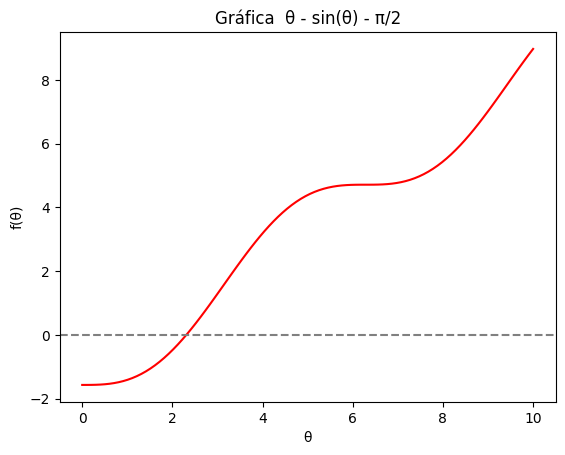

In [ ]:
# Aqui va su código
#a)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = lambda x: x-np.sin(x)-np.pi/2

#b)
x = np.linspace(0,10,100)
y = f(x)

plt.plot(x,y, color="red")
plt.axhline(0, color='gray', linestyle='--')
plt.title('Gráfica  θ - sin(θ) - π/2')
plt.xlabel('θ')
plt.ylabel('f(θ)')

In [ ]:
#c)
#Encontremos las raices de la función
import sympy as sym
from scipy.optimize import newton, bisect, fixed_point

x = sym.symbols("x")
f = x-sym.sin(x)-sym.pi/2
fprime = sym.diff(f,x)   #Derivada de f

f = sym.lambdify(x, f)  #f como función tipo lambda
df = sym.lambdify(x, fprime) #Derivada como función tipo lambda

In [ ]:
print(f"Usando el método de Bisección tenemos θ={bisect(f,1,3)} ")

Usando el método de Bisección tenemos θ=2.309881460010729 


In [ ]:
g = sym.sin(x)+sym.pi/2
g1 = sym.lambdify(x, g)

print(f"Usando el método de Punto Fijo tenemos θ={fixed_point(g1,1)} ")

Usando el método de Punto Fijo tenemos θ=2.3098814600100575 


In [ ]:
print(f"Usando el método de Newton tenemos θ={newton(f,1,df)} ")

Usando el método de Newton tenemos θ=2.309881460010057 


In [ ]:
print(f"Usando el método de La Secante tenemos θ={newton(f,1)} ")

Usando el método de La Secante tenemos θ=2.3098814600100575 


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


Text(0.5, 0, 'E')

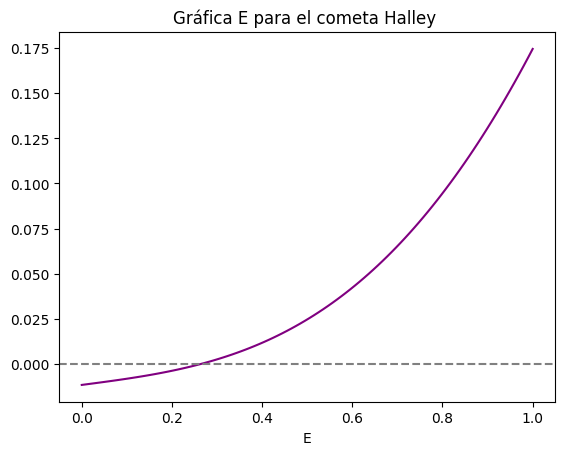

In [ ]:
# Aqui va su código
#a)

e = 0.9672671
T = 75.96000
t0 = 1986.1113
t = 51/365+1986.1113  #51 días entre 9 de febrero de 1986 (t0) y el 1 de abril de 1986

m = 2*np.pi*(t - t0)/T
f = lambda x: x-e*np.sin(x)-m

x = np.linspace(0,1,100)
y = f(x)

plt.plot(x,y, color="purple")
plt.axhline(0, color='gray', linestyle='--')
plt.title('Gráfica E para el cometa Halley ')
plt.xlabel('E')


Text(0.5, 0, 'Año')

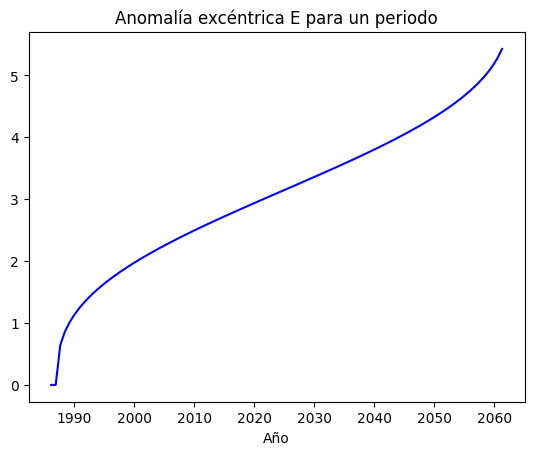

In [ ]:
#Valores de t
dt = T/100
t = np.zeros(100)

for i in range(100):
  t[i] = t0+i*dt

E = sym.symbols("E")

y = np.zeros(100)
for i in range(1,len(t)-1):
  m = 2*sym.pi*(t[i]-t0)/T
  f = E-e*sym.sin(E)-m
  f_funcion = sym.lambdify(E, f)
  y[i+1] = newton(f_funcion,0.1)

plt.plot(t,y, color="blue")
plt.title('Anomalía excéntrica E para un periodo')
plt.xlabel('Año')

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [ ]:
# Aqui va su código
#a)
x = sym.symbols("x")
f = x-sym.tanh(x/0.5)
fprime = sym.diff(f,x)   #Derivada de f

f = sym.lambdify(x, f)  #f como función tipo lambda
df = sym.lambdify(x, fprime) #Derivada como función tipo lambda

r1 = newton(f,1,df)
r2 = newton(f,1)

print(f"Usando el método de Newton tenemos m={round(r1,4)} ")
print(f"Usando el método de La Secante tenemos m={round(r1,4)} ")

Usando el método de Newton tenemos m=0.9575 
Usando el método de La Secante tenemos m=0.9575 


In [ ]:
#b)
g = sym.tanh(x/0.5)
g1 = sym.lambdify(x, g)

r3 = fixed_point(g1,1)
r3 = float(r3)
print(f"Usando el método de Punto Fijo tenemos θ={round(r3,4)} ")

Usando el método de Punto Fijo tenemos θ=0.9575 


Text(0, 0.5, 'Magnetización')

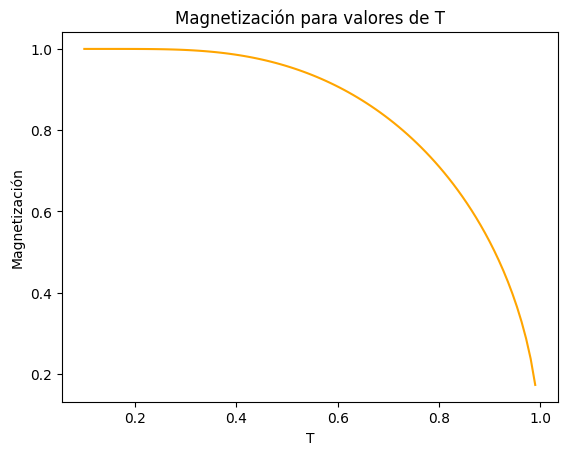

In [ ]:
#c)
T = np.linspace(0.1,0.99,100)
y = np.zeros(100)

for i in range(len(T)):
  h = x-sym.tanh(x/T[i])
  h = sym.lambdify(x, h)

  a = newton(h,1)
  y[i] = a

plt.plot(T,y, color="orange")
plt.title('Magnetización para valores de T')
plt.xlabel('T')
plt.ylabel('Magnetización')